# A2: Bias in Data
## ***Mayank Goel***

In this notebook, I will walk through potential sources of bias in a corpus of human-annotated data, and describe some implications for those biases. 

The corpus I am using is called the Wikipedia Talk corpus, and it consists of three datasets. Each dataset contains thousands of online discussion posts made by Wikipedia editors who were discussing how to write and edit Wikipedia articles. Crowdworkers labelled these posts for three kinds of hostile speech: “toxicity”, “aggression”, and “personal attacks”. Many posts in each dataset were labelled by multiple crowdworkers for each type of hostile speech, to improve accuracy.


## Importing the dataset

Importing all required libraries

In [1]:
# importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import requests
from zipfile import ZipFile
from urllib.request import urlretrieve
import os


Declaring all datasource as constants for each access later on. <br>
Downloading the files in the data folder using these links.

In [2]:
#Dataset source
TOXICITY_COMMENTS = 'https://ndownloader.figshare.com/files/7394542' 
TOXICITY_ANNOTATIONS = 'https://ndownloader.figshare.com/files/7394539'
TOXICITY_DEMOGRAPHICS = 'https://ndownloader.figshare.com/files/7640581'

ATTACK_COMMENTS = 'https://ndownloader.figshare.com/files/7554634' 
ATTACK_ANNOTATIONS = 'https://ndownloader.figshare.com/files/7554637'
ATTACK_DEMOGRAPHICS = 'https://ndownloader.figshare.com/files/7640752'

AGGRESSION_COMMENTS = 'https://ndownloader.figshare.com/files/7038038' 
AGGRESSION_ANNOTATIONS = 'https://ndownloader.figshare.com/files/7394506'
AGGRESSION_DEMOGRAPHICS = 'https://ndownloader.figshare.com/files/7640644'


#Download the files 
urlretrieve(TOXICITY_COMMENTS, 'data/toxicity_comments.tsv')
urlretrieve(TOXICITY_ANNOTATIONS, 'data/toxicity_annotations.tsv')   
urlretrieve(TOXICITY_DEMOGRAPHICS, 'data/toxicity_demographics.tsv')   

urlretrieve(ATTACK_COMMENTS, 'data/attack_comments.tsv')
urlretrieve(ATTACK_ANNOTATIONS, 'data/attack_annotations.tsv')
urlretrieve(ATTACK_DEMOGRAPHICS, 'data/attack_demographics.tsv')

urlretrieve(AGGRESSION_COMMENTS, 'data/aggression_comments.tsv')
urlretrieve(AGGRESSION_ANNOTATIONS, 'data/aggression_annotations.tsv')   
urlretrieve(AGGRESSION_DEMOGRAPHICS, 'data/aggression_demographics.tsv')

('data/aggression_demographics.tsv', <http.client.HTTPMessage at 0x1a237c5198>)

There are three files related to toxicity dataset. Reading all those toxicity files as dataframes

In [3]:
toxicity_comments = pd.read_csv('data/toxicity_comments.tsv', sep='\t')
toxicity_annotations = pd.read_csv('data/toxicity_annotations.tsv', sep='\t')
toxicity_demographics = pd.read_csv('data/toxicity_demographics.tsv', sep='\t')


There are three files related to attack dataset. Reading all those attack files as dataframes

In [4]:
attack_comments = pd.read_csv('data/attack_comments.tsv', sep='\t')
attack_annotations = pd.read_csv('data/attack_annotations.tsv', sep='\t')
attack_demographics = pd.read_csv('data/attack_demographics.tsv', sep='\t')

There are three files related to aggression dataset. Reading all those aggression files as dataframes

In [5]:
aggression_comments = pd.read_csv('data/aggression_comments.tsv', sep='\t')
aggression_annotations = pd.read_csv('data/aggression_annotations.tsv', sep='\t')
aggression_demographics = pd.read_csv('data/aggression_demographics.tsv', sep='\t')

### Let's check out one of the dataset to understand the data first

For demo purpose, I am printing the files for toxicity dataset.

**Comments file for toxicity dataset**

In [6]:
toxicity_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test


**Annotations file for toxicity dataset**

In [7]:
toxicity_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


**Worker Demographics file for toxicity dataset**

In [8]:
toxicity_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


Now that we have explored what the three files contain, we can join them using the keys as following. <BR>
**Joined file for toxicity dataset**

In [9]:
toxicity_joined = toxicity_annotations.join(toxicity_demographics, on="worker_id", rsuffix="_demo")
toxicity_joined.head()

,rev_id,worker_id,toxicity,toxicity_score,worker_id_demo,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,1789.0,male,1.0,30-45,bachelors
1,2232.0,4000,0,0.0,NaN,NaN,NaN,NaN,NaN
2,2232.0,3989,0,1.0,NaN,NaN,NaN,NaN,NaN
3,2232.0,3341,0,0.0,3974.0,male,0.0,18-30,hs
4,2232.0,1574,0,1.0,3863.0,female,0.0,18-30,professional


Similarly we can now join the files for attack dataset <br>
**Joined file for toxicity dataset**

In [10]:
attack_joined = attack_annotations.join(attack_demographics, on="worker_id", rsuffix="_demo")
attack_joined.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,worker_id_demo,gender,english_first_language,age_group,education
0,37675,1362,0.0,0.0,0.0,0.0,0.0,3248.0,male,0.0,30-45,bachelors
1,37675,2408,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,37675,1493,0.0,0.0,0.0,0.0,0.0,2953.0,female,0.0,30-45,hs
3,37675,1439,0.0,0.0,0.0,0.0,0.0,49.0,male,0.0,18-30,professional
4,37675,170,0.0,0.0,0.0,0.0,0.0,1127.0,female,0.0,45-60,masters


Similarly we can now join the files for attack dataset <br>
**Joined file for aggression dataset**

In [11]:
aggression_joined = aggression_annotations.join(aggression_demographics, on="worker_id", rsuffix="_demo")
aggression_joined.head()

,rev_id,worker_id,aggression,aggression_score,worker_id_demo,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,3248.0,male,0.0,30-45,bachelors
1,37675,2408,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,37675,1493,0.0,0.0,2953.0,female,0.0,30-45,hs
3,37675,1439,0.0,0.0,49.0,male,0.0,18-30,professional
4,37675,170,0.0,0.0,1127.0,female,0.0,45-60,masters


## Analysis 1: Identifying labeling bias due to demographics

### Motication for Analysis

#### Why this analysis
Demographics can play a big role on how thre worker annotate the dataset. Your gender, region, education, age can play a massive role in shaping your mindset, which would evenutally reflect in the labels annotated. Therefore, it is important to check the labelling is not being affected by the demographics of the lablellers. Further, it is also very important to ensure that the distribution of demographics of the labellers is similar to that of the population.

#### What bias are we looking for
Through this analysis, we will try to gaze if the demographics of the labellers have impacted how they have labelled this corpus dataset. We will assume that the true probablity of a particular comment to be toxic, attack or aggressive is the same for all labellers.

#### Dataset for this analysis
To provide a wholesome picture of the corpus data, I would be doing this analysis on all the three datasets. This would provide a deeper understanding of bias compared to picking only one or two datasets.

#### How are we measuring the bias

We will first set up a function to measure and plot this bias so that we can reuse this for each dataset. 
* The function first groups the joined datasets based on the given demographic. 
* The next step is to find the percentage of the comments that were annotated positively for that particular group. This can be easily done by taking the mean of the indicator column, since our labels are 1 and 0
* After manipulating the dataset and calculating the measures, we can then plot the measures.
* Two differnt plots have been shown by taking the transform of the dataframe, so that its easier to see that data fom different perspective.

In [25]:
def demographic_bias(attribute):
    df1 = toxicity_joined[[attribute,'toxicity']].groupby(attribute).mean()
    df2 = attack_joined[[attribute,'attack']].groupby(attribute).mean()
    df3 = aggression_joined[[attribute,'aggression']].groupby(attribute).mean()
    df = pd.concat([df1, df2, df3], axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    df.T.plot.bar(ax = axs[0])
    df.plot.bar(ax = axs[1])

    if not os.path.exists('output'):
        os.makedirs('output')
    
    df.to_csv('output/' + attribute + '_labelling_bias.csv')
    plt.savefig('output/' + attribute + '_labelling_bias.png')

    

### Presentation of results

#### Labeling bias due to gender

In this sub-analysis, we will study the bias due to gender in labelling.

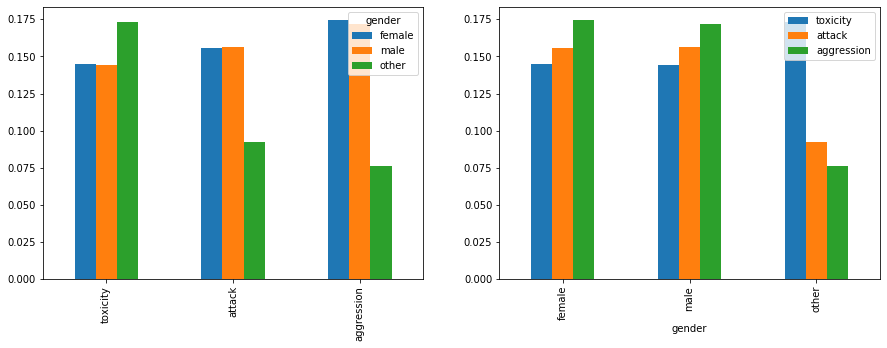

In [26]:
demographic_bias('gender')

##### Is there bias ?
As we can see from the plots above, there is a significant difference between how males and females labelled this dataset. Females have indicated higher proportion of comments as toxic or aggressive compared to males. 
<br>
This bias can be easily explained due to the prevailaing discrimination in the world and different experiences of males and females. This bias can seriosly impact the results of any model, if not taken into account.

#### Labeling bias due to education

In this sub-analysis, we will study the bias due to gender in education.

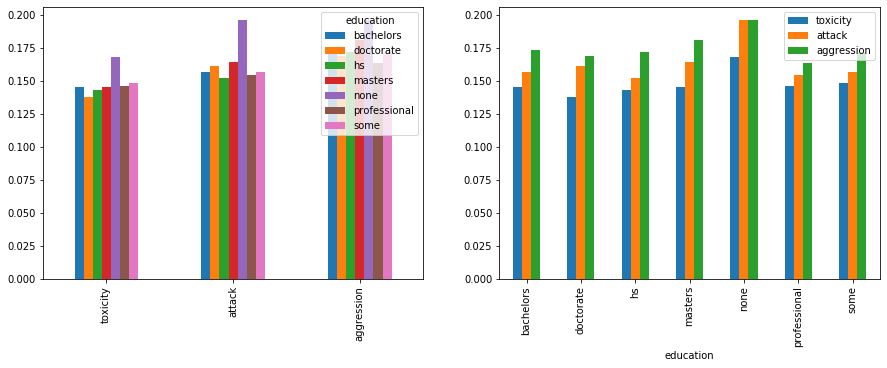

In [27]:
demographic_bias('education')

##### Is there bias ?
As we can see from the plots above, there is a significant difference between how workers from different education background have labelled this dataset. The group described as none has very different proportions compared to other groups. 
<br>
This bias can be explained due to the different experiences and differnt maturity levels that come with different education. Education level can make a person more tolerable or intolerable towards particular sentiments. <br>
This bias can also impact the results of any model, however the difference is not as pronounced as the gender.

#### Labeling bias due to age group

In this sub-analysis, we will study the bias due to age in labelling.

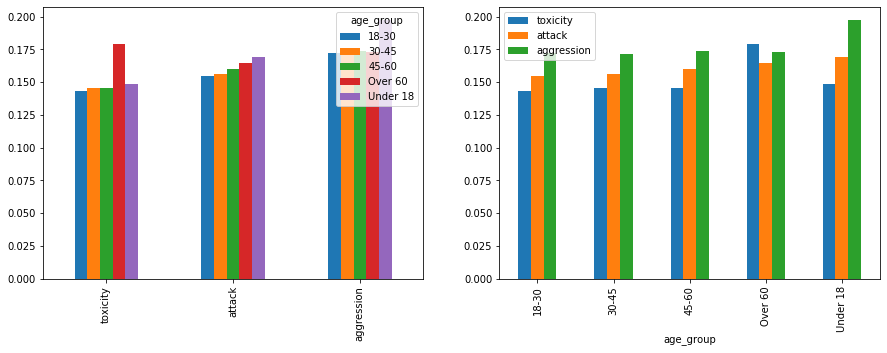

In [28]:
demographic_bias('age_group')

##### Is there bias ?
As we can see from the plots above, there is a difference between how workers from different age groups have labelled this dataset. For example, age group over 60 is much more likely to report a comment as toxic compared ot other groups. Similarly, age group under 18 is much more likely to report a comment as aggressive compared to other groups
<br>
This bias can stem due to the different experiences and differnt maturity levels at differnt age. Someone under 18 would percieve the world very differently from someone above 60. <br>
This bias can also impact the results of any model, specially if the model is targetted towards any customer group with a defined age group. This bias can be prevented by sampling the data according the use case.

#### Labeling bias due to English language

In this sub-analysis, we will study the bias due to gender in English language.

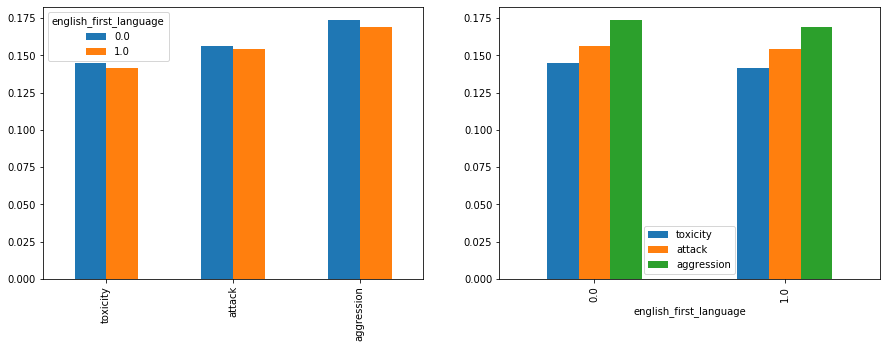

In [16]:
demographic_bias('english_first_language')

##### Is there bias ?
As we can see from the plots above, there is a difference between how workers have labelled this dataset based on whether English is there first language or not. Labellers with English as first language are more likely to indicate 
the comment as toxic, attack or aggresive. <br>
The bias is present in all three datasets.

<br>
This bias can stem due to the difference in understanding of the nuances of English language. For exmaple, workers with English as their second or third language can be more forgiving in considering a comment as toxic as they are not aware of the true implication or intensity of the words used. <br>
This bias can also impact the results of models. For instance, it may not work well if the all the users of the model are native English speakers which expect a higher level of scrutiny. This bias can be prevented by sampling the data according the English know-how of the user base.

## Analysis 2: Identifying bias due to disagreement in labelling

### Motication for Analysis

#### Why this analysis
As the comments in this dataset were annotated by multiple workers, we have the opportunity to analyse the diagreement among these workers. Since this is a subjective issue, workers are likely to have different opinions abou the comments. However, this difference of opinion can become a socurce of major bias. When there is not enough clarity about the outcome of the label, or there is not consensus, in that case, is is very hard to obtain high level of accuracy based on that dataset. Hence, it is important to measure disagreement in this dataset.

#### What bias are we looking for
Through this analysis, we will try to gaze if the disagreement among the labellers and how it may impact any subsequent models. We will assume that in a ideal scenario all the workers annotating a particular comment will either mark it as 0 or 1. I have defined the disagreement as the ratio of number of labellers on the intority side divided by the number of abellers on the majority side.
<br><br>
Disagreement Ratio = Min(# of True Labellers, # of False Labellers)/Max(# of True Labellers, # of False Labellers)

#### Dataset for this analysis
To provide a wholesome picture of the corpus data, I would be doing this analysis on all the three datasets. This would provide a deeper understanding of bias compared to picking only one or two datasets.

#### How are we measuring the bias

* We will first set up a function to measure the disagreement ratio.
* We will create another function which measures the disagreement ratio by first filtering out the comments where no labellers has marker it positive. This will allow us to gaze disagreement among the comments where at least one labellers believes that it should be marked positively.
* The function first calculates the number of yes labellers and no labellers.
* Thereafter, the function calculates the min and max of these two groups.
* Once this is done, the function calculates the ratio as defined above.
* After manipulating the dataset and calculating the measures, we can then plot the histogram for this ratio to see overall disagreement in the dataset.
* Two differnt plots have been shown by for each ratio so that we can interpret both scenarios.

In [17]:
def disagreement_bias_total(dataset, attribute):
    df = dataset.groupby('rev_id')[attribute].agg([sum,'count'])
    df = df[df['count']>1]
    df = df.rename(columns={'sum': 'Yes-Labels', 'count': 'Total-Labels'})
    df['No-Labels'] = df['Total-Labels']-df['Yes-Labels']
    df['Disagreement'] = (df[['Yes-Labels', 'No-Labels']].min(axis=1))/(df[['Yes-Labels', 'No-Labels']].max(axis=1))
    df = df[['Yes-Labels', 'No-Labels','Total-Labels','Disagreement' ]]
    return df


def disagreement_bias_atleast_one_yes(dataset, attribute):
    df = dataset.groupby('rev_id')[attribute].agg([sum,'count'])
    df = df[df['count']>1]
    df = df[df['sum']>0]
    df = df.rename(columns={'sum': 'Yes-Labels', 'count': 'Total-Labels'})
    df['No-Labels'] = df['Total-Labels']-df['Yes-Labels']
    df['Disagreement'] = (df[['Yes-Labels', 'No-Labels']].min(axis=1))/(df[['Yes-Labels', 'No-Labels']].max(axis=1))
    df = df[['Yes-Labels', 'No-Labels','Total-Labels','Disagreement' ]]
    return df

### Presentation of results

#### Disagreement in Toxicity dataset

In this sub-analysis, we will study the bias due to disagreement in toxicity dataset.

In [30]:
toxicity_total = disagreement_bias_total(toxicity_annotations,'toxicity')
toxicity_atleast_one = disagreement_bias_atleast_one_yes(toxicity_annotations,'toxicity')
toxicity_atleast_one.to_csv('output/' + 'toxicity_disagreement_bias.csv')
toxicity_atleast_one.head(10)


,Yes-Labels,No-Labels,Total-Labels,Disagreement
rev_id,,,,
2232.0,1,9,10,0.111111
28959.0,2,8,10,0.250000
35367.0,1,9,10,0.111111
37330.0,3,7,10,0.428571
37346.0,1,9,10,0.111111
37675.0,2,8,10,0.250000
91460.0,1,9,10,0.111111
109914.0,1,9,10,0.111111
114890.0,1,9,10,0.111111


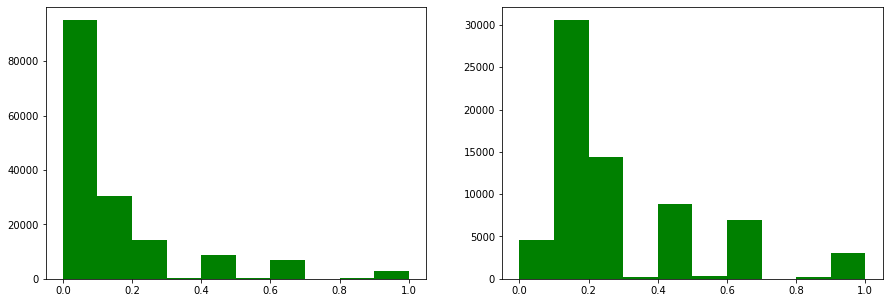

<Figure size 432x288 with 0 Axes>

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].hist(toxicity_total.Disagreement, 10, range=[0, 1], facecolor='green', align='mid')
axs[1].hist(toxicity_atleast_one.Disagreement, 10, range=[0, 1], facecolor='green', align='mid')
plt.show()
plt.savefig('output/'+'toxicity_disagreement_bias.png')


#### Disagreement in attacks dataset

In this sub-analysis, we will study the bias due to disagreement in attacks dataset.

In [32]:
attack_total = disagreement_bias_total(attack_annotations,'attack')
attack_atleast_one = disagreement_bias_atleast_one_yes(attack_annotations,'attack')
attack_atleast_one.to_csv('output/' + 'attack_disagreement_bias.csv')
attack_atleast_one.head(10)

,Yes-Labels,No-Labels,Total-Labels,Disagreement
rev_id,,,,
89320,4.0,5.0,9,0.800000
155243,2.0,7.0,9,0.285714
192579,1.0,7.0,8,0.142857
249432,2.0,8.0,10,0.250000
290598,3.0,15.0,18,0.200000
375422,2.0,8.0,10,0.250000
398923,1.0,9.0,10,0.111111
554005,3.0,16.0,19,0.187500
569192,1.0,18.0,19,0.055556


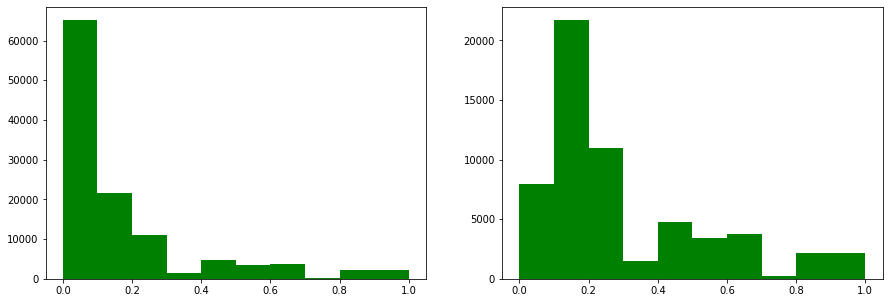

<Figure size 432x288 with 0 Axes>

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].hist(attack_total.Disagreement, 10, range=[0, 1], facecolor='green', align='mid')
axs[1].hist(attack_atleast_one.Disagreement, 10, range=[0, 1], facecolor='green', align='mid')
plt.show()
plt.savefig('output/'+'_attack_disagreement_bias.png')


#### Disagreement in aggression dataset

In this sub-analysis, we will study the bias due to disagreement in aggression dataset.

In [33]:
aggression_total = disagreement_bias_total(aggression_annotations,'aggression')
aggression_atleast_one = disagreement_bias_atleast_one_yes(aggression_annotations,'aggression')
aggression_atleast_one.to_csv('output/' + 'aggression_disagreement_bias.csv')
aggression_atleast_one.head(10)

,Yes-Labels,No-Labels,Total-Labels,Disagreement
rev_id,,,,
37675,1.0,9.0,10,0.111111
89320,4.0,5.0,9,0.800000
111032,2.0,8.0,10,0.250000
128532,1.0,9.0,10,0.111111
155243,2.0,7.0,9,0.285714
249432,4.0,6.0,10,0.666667
290598,3.0,15.0,18,0.200000
336654,1.0,18.0,19,0.055556
344567,1.0,15.0,16,0.066667


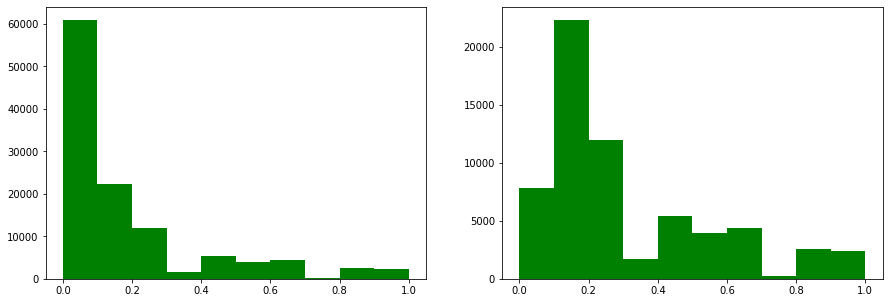

<Figure size 432x288 with 0 Axes>

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].hist(aggression_total.Disagreement, 10, range=[0, 1], facecolor='green', align='mid')
axs[1].hist(aggression_atleast_one.Disagreement, 10, range=[0, 1], facecolor='green', align='mid')
plt.show()
plt.savefig('output/'+'_aggression_disagreement_bias.png')

#### Is there bias ?
As we can see from the plots above, there is a lot of disagreement among the workers in all the three datasets. We can see that with comments with atlease one 'Yes' labeller, disagreement ratio can go as high as 1. In most scenarios there are atleast 20 % labellers taking the opposite side as the majority. This kind of bias can truly harm any model based on it. 

The bais will make it difficult for any model to correctly predict the label for any comment. Further, as different segments of society have different views rgarding the subjective nature of comments, it will hard to build a model which works well for all sections of the society.
<br>
This bias is very difficult to fix due to the subjective nature of the data. However, the bias can be handled by alloting a base level to each lableller based on their tendency to mark a comment as positive. Thereafter, this baseline for the labeller can be used to standardize all their ratings, and hence bring the dataset to slightly more unbiased state.  <br>


## Implications for research and product development

**Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?**

I think that the performance of a model is dependent on the context of the problem. Therefore, this dataset would perform good in scenarios where context is similar, i.e. applications related to identifying the toxicity or aggression in the speech.

1. Therefore this model should work well for the comment filter based on level of toxicity, since the model based on this dataset can do a great job at filtering our toxic or aggressive comments on the internet. 
2. It will also work well with the behave application where a Chrome extension replaces toxic comments with fun emojis. Since, the application is based on identifying toxic comments, it is likely to have similar context as with the dataset.

The biased found in this notebook would have some implications on these applications as the applications rely on being good training data across demographics.

**Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?**

The datset would perform poorly in models where the context is slightly or completely different. This is because the knowledge of labellers will not be directly applicable. From the perspective AP, here are some projects that may not work well.

1. Hot Topics in one such application. Since the aim is to help identify topics that may be heated and need extra community involvement, the dataset may fall short of context. For example hot topics can also be without any aggression, attacks or toxicity. this dataset would miss those cases and would not be able to classify them.
2. Authorship Feedback is another application where it may not apply well. For example, the aim of this application is to provide real time feedback to author, however, the training dataset is based on comments which are provided as a whole and hence with their whole context. It is much easier to judge those comments in the dataset compared to judging an opening phrase of comment without full context.

Although the biases found in the notebook would make the models worse, the main damage would come from the lack of built in context into the corpus.

**What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models?**

There are lot of other speeches where this dataset may not work. For example
* Sarcasm can be a form of hostile speech which is hard to identify for models. The dataset would unlikelt have enough examples of attacking or aggressive comments that are based in sarcasm, and hence the application based on thess datasets would not perform well.
* The model would remain completely irrelevant to any non-English text. Even within English, people often being up words from other language when they are being aggressive, however models based on this datasets would fail to recognixe that.
* The model would also fail to recognize passive aggressive and subtle comments which do not make use of abusive language but still are condescending towards other readers.

The biases in this analysis would be relevant to these issues as well, as the differences in labelling due to demographics will get pronounces for subtle comments.